# Computer Homework 5: Numerical solutions to $RC$ circuits
This week, you've learned about resistors, capacitors, and the current that passes through these circuits.  This coming week, you will see how combining these elements can lead to interesting time dependence, specifically when we put resistors and capacitors in series with one another.  Most simple circuits can be solved using a variety of techniques.  As circuits become more complicated, or as the signals the circuits are processing become more complicated, finding an exact solution can become more difficult.  

In yesterday's class, we learned in class that
\begin{equation}
I = \frac {dQ} {dt}
\end{equation}

This simple definition implies that many circuits can be expressed in the language of differential equations. The purpose of this assignment is to learn how to solve these equations numerically. 

Consider a first-order equations of the form:
\begin{equation}
\frac {dx} {dt} = f(x,t).
\end{equation}

The solution to this equation is a function $x(t)$ whose first derivative is $f$.
To find the solution to such an equation, we also need boundary conditions, or starting points.  Suppose that we have a first-order differential equation and know the value of $x$ for some specific time $t$, that is we know $x(t)$.  The we can write the value of x some short time later as
\begin{equation}
x(t+h) = x(t) + h \frac {dx} {dt} + \frac 1 2 h^2 \frac {d^2x} {dt^2} + ...
\end{equation}

\begin{equation}
x(t+h) = x(t) + h f(x,t) + h^2 \frac {df(x,t)} {dt} + ...
\end{equation}

If $h$ is small then $h^2$ is really small, and we can ignore it, and all higher terms of $h^n$.  This technique is called Euler's method.

Using this, if we know the value of $x$ at some time $t$ we can find the value at some short time later.  We can then repeat this process and understand how $x$ changes over time. The set of $x$ values at a discrete set of $t$ values is the numerical solution to our differential equation.

We are going to use this method to find the current, voltages and charges in simple circuits.  We will start with circuits which are easy to solve analytically so we can verify the numerical solution. Later we'll consider circuits that are a little more difficult.


## Import the usual libraries

In [1]:
import numpy as np                         # numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            # this is the library we use to plot

## Example from Mechanics: the Simple Harmonic Oscillator

To illustrate these ideas, let's work out the solution to a situation with which you are already familiar: the simple harmonic oscillator, e.g. a mass on a spring:
<img src="http://www-personal.umich.edu/~gerdes/img/SHO.png" height="300" align="center">
This system is described by Newton's second law:
$$
    F = ma = m\frac{d^2x}{dt^2}= -kx.
$$

This is a second-order differential equation (it relates the function $x(t)$ to its second derivative), so we need to specify two boundary conditions. In mechanics, boundary conditions are often the initial position and velocity. 

Let's suppose that the mass starts from rest at $x=1$. We know that the solution to Newton's second law is
\begin{eqnarray}
        x(t)& = & A\cos\omega t \\
        v(t) & = &-A\omega\sin\omega t \\
        a(t)& = &-A\omega^2\cos\omega t,
\end{eqnarray}
where $\omega = \sqrt{k/m}$, and in this case $A=1$.

In discrete form, our equations look like:
$$
    \Delta v = a\Delta t,
$$
$$
    \Delta x = v\Delta t.
$$

Let us also assume that there is some viscous damping or friction that the mass experiences leading to a damping term, $cv$, that manifests in Newton's 2nd law as,
\begin{eqnarray}
    m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx = 0\\
    ma + cv + kx = 0
\end{eqnarray}

Note, the acceleration depends on both the position and velocity as,
\begin{eqnarray}
    a = -cv/m - \omega x
\end{eqnarray}

Since it is a damping term, let us consider a damping coefficient of $c/m=0.1$.  To later test our code for a frictionless surface, we can set $c/m = 0$.

Then we can proceed as follows:

### First, we define constants that set up the problem, m, k, and initial state $x_0$, and $v_0$ 

In [35]:
m = 1 # Mass
k = 1 # Spring Constant

# Initial position and velocity.
x0 = 1
v0 = 0

# Damping term
c = 0.1

### Set up constants in the relevant equations based on constants above (2min) 
- $\omega(k,m)$ (frequency) and 
- $T(\omega) = 2\pi/\omega$ (period, which is a function of frequency):


In [36]:
# Your code here
omega = np.sqrt(k/m)
T = 2*np.pi/omega

### Next, we set up some python object that provide structure to integrate this problem over several timesteps.  Ultimately, we'll want $x(t)$, $v(t)$, $a(t)$.  Each timestep, $dt$ should be small compared with the period so an entire period is relatively well-resolved.  Note, here, resolution refers to *time* resolution.  In the past, we've considered *spatial* resolution.  (2 min)
- Define dt in terms of the period (suggestion, perhaps 100 timesteps per period), and 
- Use the np.arange() method to create an array of timesteps varying from 0 though 5 periods with timestep increments of dt.

In [37]:
# Set up some constants to integrate the problem over some number of timesteps.  The timestep should be small 
#    compared with the period
dt = T/1000
timesteps = np.arange(0, 5*T, dt)

### Since we will want x(t), v(t), and a(t), we will want as many values of each (i.e. the same shape of each) as the number of timesteps.  (5 min)
- Use the np.zeros() method, and information about the shape of timesteps to create an xarray, varray, and aarray:

In [38]:
# Set up arrays to store x(t), v(t), and a(t), which will hold the values of x, v, and a at each time step.
xarray = np.zeros(np.shape(timesteps))
varray = np.zeros(np.shape(timesteps))
aarray = np.zeros(np.shape(timesteps))

In [39]:
# Initialize an x and v, which will fill your xarray and yarray.
x = x0
v = v0

In [40]:
# Main loop over timesteps here
for inum, timestep in enumerate(timesteps):  #  Access iteration number and corresponding timestep
    # print(inum, timestep) --> access inum-th index
    
    a = -c*v - k * x
    
    # Populate
    aarray[inum] = a
    xarray[inum] = x
    varray[inum] = v

    # Update
    v = v + a*dt
    x = x + v*dt


### Let's make a plot.  (5min)
- First, initialize a figure with three axes set up as a 3x1
Now we can plot our results for $x$, $v$, and $a$. Do the results look like what you expect?

Text(0.5,0,'Time in units of period')

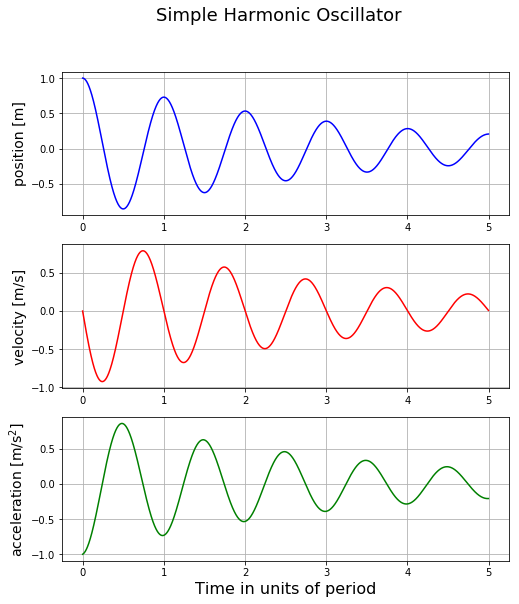

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,9))
fig.suptitle('Simple Harmonic Oscillator', fontsize=18)
ax1.plot(timesteps/T, xarray, color='b')
ax1.grid()
ax1.set_ylabel('position [m]', fontsize=14)
ax2.plot(timesteps/T, varray, color='r')
ax2.grid()
ax2.set_ylabel('velocity [m/s]', fontsize=14)
ax3.plot(timesteps/T, aarray, color='g')
ax3.grid()
ax3.set_ylabel('acceleration [m/s$^2$]', fontsize=14)
ax3.set_xlabel('Time in units of period', fontsize=16)

### We can minimize code by using the zip() built-in method to group the axes, y-label, and y-values, then iterating over each grouping.
- Next, zip the three axes, the y-labels, and the y-values.  Identify the "redundant lines" and plot in a for loop. 


In [44]:
# Plotting code using the zip() built-in method here
mynums = np.array([1,2,3,5])
mywords = np.array(['one','two','three','five'])
myromannums = np.array(['I','II','III','V'])

for mynum, myword, myromannum in zip(mynums,mywords, myromannums) :
    print(mynum)
    print(myword)
    print(myromannum)

1
one
I
2
two
II
3
three
III
5
five
V


In [47]:
for ax, yarray in zip([1,2],['one']) :
    print(ax)
    print(yarray)

1
one


## Your assignment Due Friday Feb 14

Apply these techniques to calculate the currents and voltages in circuits with a resistor, capacitor and voltage source.  The voltage and current through a resistor is given by $V=IR$, the voltage across a capacitor is given by $V=Q/C$ and the voltage from a battery is just $V$.

### Part 1 (15 points) Calculate the discharge of a capacitor through a resistor.
The capacitor will have some initial charge $Q$ based on the initial voltage on the capacitor, $V_0=10$ V, and the capacitance, $C = 20\times10^{-06}$ Farads.  The rate of discharge will be the current through the capacitor $\frac {dQ} {dt}$, which will depend on the value of the resistance, $R_1=10 \Omega$.  
<img src="http://www-personal.umich.edu/~gerdes/img/MC-PythonCircuit01.png" height="400" width="400">
Setup three one-dimensional arrays, one for the time, one for the current in the circuit and one for the charge on the capacitor.  Since the current in the capacitor must be the same as the current in the resistor, we have
\begin{equation}
\frac {dQ} {dt} = I = \frac V R
\end{equation}
and
\begin{equation}
 V = \frac Q C
\end{equation}


Thus, we have our simple first order differential equation
\begin{equation}
\frac {dQ} {dt} = \frac Q {RC}
\end{equation}

Turning this into a discrete expression, we get 
\begin{equation}
\Delta Q = \frac Q {RC} \Delta t
\end{equation}

So, choose values for $R$, $C$ and the initial charge $Q$.  Then pick an appropriate time step $\Delta t$.  For each time step calculate the change in charge, $\Delta Q$, and the corresponding current through the resistor and total charge on the capacitor.  Then subtract this $\Delta Q$ from the charge on the capacitor and repeat the process.

* Plot the current through the resistor and the charge on the capacitor as a function of time. Try making your plots on both a linear and a semilogy scale to verify that the behavior is exponential.

* Use your program to compute the total amount of energy dissipated in the resistor, and show that it's equal to the initial stored energy in the capacitor. 


### First, we define constants that set up the problem, R, C, $V_0$.

In [ ]:
# Your code goes here.  First, define your constants - R, C, V0

### Next, set up constants based on above: $Q_0(C, V_0)$, $RC(R, C)$ (this is the equivalent of T in the harmonic oscillator and provides a characteristic timescale), and $U_{cap}(C, V_0)$ (the energy stored in the capacitor).

In [ ]:
#  Define constants here and calculate the energy stored in the capacitor based on other constants

### Define your timesteps using np.arange, keeping in mind that you want small timesteps compared with the period of oscillation.

In [ ]:
# Timestep definition here

### Now, we will want $Q(t)$, $I(t)$, and $P_{R}(t)$ (power dissipated by the resistor), and as many values of each (i.e. the same shape of each) as the number of timesteps.

In [ ]:
# Create arrays for charge, current, and power dissipated at each timestep: e.g. qarray, iarray, parray

### In the next cell, we iterate (loop) over timesteps to calculate the charge, current, and power dissipated by the resistor  at each timestep.
- Before starting the loop, you'll need to set Q and I to the initial states $Q_0$ and $I_0=Q_0/RC$. The Q and I variables will change within the loop and populate the qarray and iarray, and power dissipated is $P=I^2R$ 

In [ ]:
# Set initial charge and current for first timestep

- Here, you will want to loop through the timesteps keeping track of the number of iterations, inum (see example from class).  At each timestep, you'll populate the qarray, iarray, and parray at that inum, then update Q due to because of discharge in capacitor at that timestep, and update I due to the new total charge on the capacitor plate.

In [ ]:
# Main loop over timesteps here

### Perform your quick computation of total power dissipated by the resistor.  Compare this with the energy stored in the capacitor that you calculated earlier, $U_{cap}$.

In [ ]:
# Hint: You'll want to sum over power dissipated at the end of each timestep. 
#   Remember that power is energy/time 

### Plot the charge on the capacitor and the current as a function of time below.  

In [ ]:
#  Plot here, try using the subplots as we did in the example.  But, this time with a 2x1 set of axes. 

Write your explanation here. Be sure to discuss the agreement of your solution with the analytic solution, and explain why the time step you chose is adequate. 

### Part 2 (15 points) Calculate the charge on a capacitor from a battery through a resistor.
This is very similar to Part 1 - essentially only the boundary conditions have changed.  
<img src="http://www-personal.umich.edu/~gerdes/img/MC-PythonCircuit02.png" height="400" width="400">
The capacitor will start with no charge on the plates, and it will be charged from the battery.  The inital voltage across the capacitor is then zero, and the initial current through the resistor will be $I = \frac {V_b} {R}$ where $V_b$ is the voltage of the battery.

* Write down the differential equation which includes this initial condition, and solve numerically.  Plot the current through the resistor and the charge on the capacitor as a function of time.

* Compute and plot the power delivered by the battery to the circuit as a function of time. When is the battery delivering the most power to the circuit?

* Compute the total energy delivered by the battery to the circuit. What fraction of this energy is stored in the capacitor, and what fraction is dissipated as heat in the resistor? Does your answer to the last question depend on the values of $R$ and $C$?

Keep the loop rule in mind,
\begin{eqnarray}
V - IR - Q/C = 0
\end{eqnarray}

### Set your constants for the problem here: 
$R_1 = 2\Omega$, $C_1 = 20e-06$ Farad, $V_b=5$V, $Q_0=0$.

In [ ]:
# Set constants here

###  Set additional constants based on above here

In [ ]:
#  This would be your RC, and define timesteps here

### Set up the arrays to store charge, current, power dissipated by resistor, and power dissipated by the battery here.  Note, these must have the same size as the timesteps array.

In [ ]:
#  Set up arrays, e.g. qarray, iarray, prarray, pbarray

### Here, you will want to loop over timesteps as before, but keep in mind that you are also delivering power from the battery

In [ ]:
#  First, initialize the variables that will be updated.  Then, write main loop here

### Calculate and compare values of total energy delivered, stored on the capacitor, dissipated by the resistor, and use this information to figure out the efficiency of the system.

In [ ]:
#  Your calculations here

### Plot the charge on capacitor, current, and power delivered here.

In [ ]:
#  Plotting code here

Write your explanation and comments here.

### Part 3 (10 pts) Essay question

You have now solved a simple first order differential equation numerically.  You have solved this kind of an equation analytically (e.g. the spring problem).  Which is easier?  What are the advantages and disadvantages of each method?  Note, if you struggled through the previous problems of the homeowrk, base your essay question on the Example with the Harmonic Oscillator with a spring. **You can still receive full points on this essay question** if you do not have full answers for the first two parts.